## Universal Bank problem using kNN

### Personal Loan Acceptance
Universal Bank is a relatively young bank growing rapidly in terms
of overall customer acquisition. The majority of these customers are liability customers
(depositors) with varying sizes of relationship with the bank. The customer base of asset
customers (borrowers) is quite small, and the bank is interested in expanding this base rapidly
to bring in more loan business. In particular, it wants to explore ways of converting its liability
customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate
of over 9% success. This has encouraged the retail marketing department to devise smarter
campaigns with better target marketing. The goal is to use k-NN to predict whether a new
customer will accept a loan offer. This will serve as the basis for the design of a new campaign.

The file UniversalBank.csv contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer’s relationship with the bank
(mortgage, securities account, etc.), and the customer response to the last personal loan
campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the
personal loan that was offered to them in the earlier campaign.

Partition the data into training (60%) and validation (40%) sets.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Exploratory data analysis

In [5]:
#loading the csv file
data_loan = pd.read_csv('UniversalBank.csv')
#looking at the data types of columns in our data frame
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


All the columns have integer data types except one which has float.

In [6]:
#checking null values
data_loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

The data has no missing values.

In [7]:
#looking at the dataset
data_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
#looking at the statistics of the data frame
data_loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We can see that the minimum value for experience is -3 which means a negative experience and that is factual incorrect. So, we need to check the rows which have negative values and the best way to deal with that is to replace negative experience with 0.

In [9]:
#finding the unique values of Education column
data_loan['Education'].unique()

array([1, 2, 3])

In [10]:
#finding the unique values of Family column
data_loan['Family'].unique()

array([4, 3, 1, 2])

It can be seen from the data frame that the columns - Family, Education, Personal Loan, Securities Account, CD Account, Online and Credit Card have categorical values. However, only the columns Education and Family have more than two categories.

### Data pre-processing

In [11]:
#Replacing negative values of Experience with 0
data_loan.loc[data_loan['Experience'] < 0, ['Experience']] = 0

In [12]:
#looking at the statistics of the data frame
data_loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.119600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.440484,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


We can see that we now have minimum experience as 0.

### (a)
Consider the following customer: Age = 40, Experience = 10, Income = 84, Family = 2,
CCAvg = 2, Education_1 = 0, Education_2 = 1, Education_3 = 0, Mortgage = 0, Securities
Account = 0, CD Account = 0, Online = 1, and Credit Card = 1. Perform a k-NN
classification with all predictors except ID and ZIP code using k = 1. Remember to
transform categorical predictors with more than two categories into dummy variables
first. Specify the success class as 1 (loan acceptance), and use the default cutoff value of
0.5. How would this customer be classified?


### Transforming categorical predictors with more than two categories into dummy variables as required in question

In [13]:
df_loan = pd.get_dummies(data_loan, columns = ['Education'])
df_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1,0,0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1,0,0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1,0,0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0,1,0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0,1,0


##### Dropping the columns ID and ZIP Code from our data frame as per the requirement of our problem

In [14]:
df = df_loan.drop(['ID','ZIP Code'], axis = 1)
df.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,1,0,0
1,45,19,34,3,1.5,0,0,1,0,0,0,1,0,0
2,39,15,11,1,1.0,0,0,0,0,0,0,1,0,0
3,35,9,100,1,2.7,0,0,0,0,0,0,0,1,0
4,35,8,45,4,1.0,0,0,0,0,0,1,0,1,0


### Train test split of the data

In [15]:
from sklearn.model_selection import train_test_split

#dropping the column which needs to be predicted 
X = df.drop('Personal Loan',axis=1).values
y = df['Personal Loan'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

### Using k = 1 to apply kNN as per our question

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [17]:
knn.score(X_test,y_test)

0.8975

In [57]:
x_pred1 = [[40,10,84,2,2,0,0,0,1,1,0,1,0]]
#x_pred2 = [[49,25,195,4,3,617,0,0,0,0,1,0,0]]  #just to check whether it is working fine or not

y_pred1 = knn.predict((x_pred1))
print(y_pred1)
#y_pred2 = knn.predict((x_pred2))   #just to check whether it is working fine or not
#print(y_pred2)       #just to check whether it is working fine or not

[0]


### (b) 
What is a choice of k that balances between overfitting and ignoring the predictor
information?

### Deciding k to apply the kNN algorithm

In [22]:
from sklearn.neighbors import KNeighborsClassifier

#Chossing the value of k from 1 to 15 and storing it in an array
neighbors = np.arange(1,15)

#creating empty arrays equal to the length of neighbors to store the accuracy score
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model 
    knn.fit(X_train, y_train) 
    
    #Compute accuracy on the training set 
    train_accuracy[i] = knn.score(X_train, y_train) 
    
    #Compute accuracy on the test set 
    test_accuracy[i] = knn.score(X_test, y_test) 

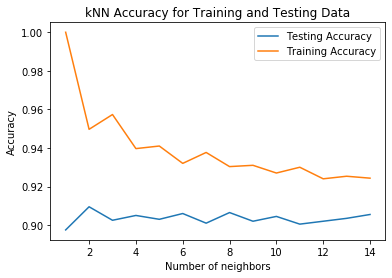

In [23]:
#Generate plot to visualize the testing and training score
plt.title('kNN Accuracy for Training and Testing Data')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe from the graph that we get the maximum testing accuracy when k = 8, after which the accuracy score is constant. So, k = 8 is considered as the hyperparameter for this problem. We can now train our model for k = 8.

### Training the model for k = 8

In [25]:
knn = KNeighborsClassifier(n_neighbors=8)
 
#Fit the model
knn.fit(X_train,y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

### Predicting on test data

In [26]:
knn.score(X_test,y_test)

0.9065

 ### (c) 
 Show the confusion matrix for the validation data that results from using the best k.

### Confusion Matrix

In [60]:
from sklearn.metrics import confusion_matrix
 
y_pred = knn.predict(X_test) 
 
print(confusion_matrix(y_test,y_pred))

[[1767   41]
 [ 146   46]]


### Classification Report

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1808
           1       0.53      0.24      0.33       192

    accuracy                           0.91      2000
   macro avg       0.73      0.61      0.64      2000
weighted avg       0.89      0.91      0.89      2000



### (d) 
Consider the following customer: Age = 40, Experience = 10, Income = 84, Family = 2,
CCAvg = 2, Education_1 = 0, Education_2 = 1, Education_3 = 0, Mortgage = 0, Securities
Account = 0, CD Account = 0, Online = 1 and Credit Card = 1. Classify the customer
using the best k.

In [58]:
x_pred_d = [[40,10,84,2,2,0,1,0,0,0,0,1,1]]


y_pred_d = knn.predict(x_pred_d) 
print(y_pred_d)

[0]


### (e)
Repartition the data, this time into training, validation, and test sets (50% : 30% : 20%).
Apply the k-NN method with the k chosen above. Compare the confusion matrix of the
test set with that of the training and validation sets. Comment on the differences and
their reason.